In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

plt.style.use('seaborn')

In [5]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [6]:
df.shape

(450, 26)

In [7]:
pd.set_option('display.max_columns',26)

pd.set_option('display.max_rows',None)

In [8]:
df.info() #Answer 1: Number of companies = 450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [9]:
filt = (df['Borough']=='Queens')
df[filt].shape 

(173, 26)

In [10]:
#Question 2:  Total number of jobs created in Queens
df.loc[filt, 'Job created'].sum() 

102.0

In [11]:
email_df = df.dropna(axis='index', how ='any', subset=['company email']) #Drop NaN emails

email_df



,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,LMEP,958.0,NaN,NaN,07/02/2015,368601.17,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ECSP,125.0,NaN,NaN,04/07/2008,1637.29,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
7,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ECSP,6.0,NaN,NaN,12/08/2009,4380.51,59681.70,Staten Island,40.633153,-74.150999,501.0,49.0,239.0,5146740.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ECSP,35.0,NaN,NaN,03/04/2011,2534.00,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
9,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ECSP,9.0,NaN,NaN,11/06/2015,31483.87,187637.74,Brooklyn,40.673106,-74.002300,306.0,38.0,53.0,3336622.0,3.005720e+09,Carroll Gardens-Columbia Street-Red Hook
11,2 Rector Street (NY) LLC,Camille Giardina,Camellia.Giardina@am.jll.com,2126195920,2 Rector Street,New York,NY,10006,Landlord,Back Offices,LMEP,495.0,NaN,NaN,12/02/2019,46523.01,221193.90,New York,40.707808,-74.013053,101.0,1.0,13.0,1001031.0,1.000510e+09,Battery Park City-Lower Manhattan
12,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,Eye glasses,ECSP,130.0,NaN,NaN,01/07/2009,28291.04,288983.01,Queens,40.742386,-73.932148,402.0,26.0,199.0,4003447.0,4.002520e+09,Hunters Point-Sunnyside-West Maspeth


In [12]:
email_df = email_df['company email'].apply(lambda x: x if'@' in x else np.nan)

In [13]:
email_df = email_df.dropna(axis='index', how ='any') #Drop NaN emails

In [14]:
email_df=email_df.apply(lambda x: x.split('@')[1])
email_df

0                 energyspec.com
3               industrycity.com
4                   silvprop.com
5                   silvprop.com
6                      dial7.com
7                      gmail.com
8              atjelectrical.com
9                      KLCNY.com
11                    am.jll.com
12        21st centuryoptics.com
13                energyspec.com
14                    4over4.com
15                       aol.com
16                      MEQS.com
17              mdc-partners.com
18                energyspec.com
19              alscientific.com
20          aksinternational.com
21                  abelcine.com
22                    abigal.com
23                 accenture.com
24             bilingualsino.com
25             actioncarting.com
26                 aduiepyle.com
27          consultant.aecom.com
28                   remains.com
29             afcindustries.com
30           africanservices.com
31                      avac.org
32             aladdinbakery.com
33        

In [15]:
email_df.nunique() #This answers number of unique domain names

356

In [16]:
nta_group = df.groupby([ 'NTA' ]).count()
nta_group

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
NTA,,,,,,,,,,,,,,,,,,,,,,,,,
Astoria,3,3,2,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3
Baisley Park,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
Battery Park City-Lower Manhattan,9,9,3,9,9,9,9,9,9,4,9,7,0,0,9,9,9,9,9,9,9,9,9,9,9
Bedford,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3
Bensonhurst West,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
Borough Park,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
Brooklyn Heights-Cobble Hill,3,3,3,3,3,3,3,3,3,2,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3
Brownsville,3,3,3,3,3,3,3,3,3,3,3,3,0,1,3,3,3,3,3,3,3,3,3,3,3


In [17]:
filt = nta_group['Company Name']>=5
nta_group = nta_group[filt]

a = nta_group[ ['Job created','Total Savings'] ]
a

,Job created,Total Savings
NTA,,
Battery Park City-Lower Manhattan,0,9
Bushwick South,1,10
Carroll Gardens-Columbia Street-Red Hook,0,11
College Point,1,7
Crown Heights North,0,9
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0,10
East New York,1,9
East Williamsburg,0,11
Greenpoint,0,14


In [18]:
a.to_csv('tdiLastQuestion.csv')

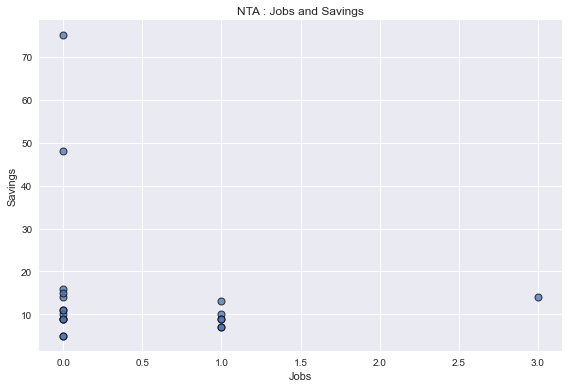

In [19]:
jobs = a['Job created']
savings = a['Total Savings']
plt.scatter(jobs, savings, edgecolor='black', linewidth=1,alpha = 0.75)
plt.title('NTA : Jobs and Savings')
plt.xlabel('Jobs')
plt.ylabel('Savings')

plt.tight_layout()

plt.show()

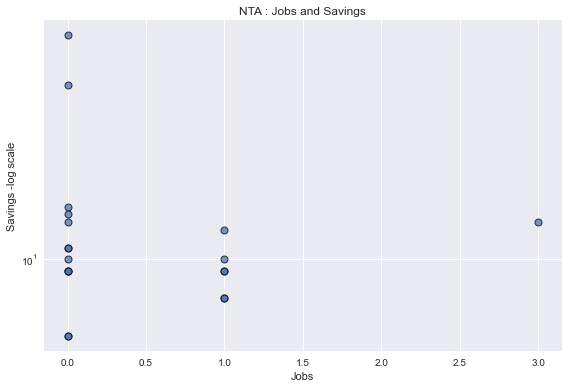

In [20]:
plt.scatter(jobs, savings, edgecolor='black', linewidth=1,alpha = 0.75)

#plt.xscale('log')
plt.yscale('log')

plt.title('NTA : Jobs and Savings')
plt.xlabel('Jobs')
plt.ylabel('Savings -log scale')

plt.tight_layout()

plt.show()

In [21]:
f = df['Total Savings']
f

0            0.00
1       136578.20
2       302959.40
3         2159.67
4       922407.32
5       368601.17
6         1637.29
7         4380.51
8         2534.00
9        31483.87
10       93675.37
11       46523.01
12       28291.04
13      436145.14
14        4922.25
15        4853.46
16        7438.51
17       15473.37
18      543391.98
19        3426.70
20        3629.27
21        5268.09
22        3447.21
23       11789.99
24        7324.68
25        2247.82
26       23372.88
27        1868.34
28        6393.98
29        4026.73
30        2508.11
31        1467.64
32       96010.85
33       75096.36
34      985418.13
35        2112.96
36       25418.76
37        8886.14
38         512.84
39        1586.41
40        1538.23
41        7448.69
42       24483.37
43       11592.42
44        8115.63
45        6643.63
46       44169.37
47       33292.12
48       44334.30
49        4968.04
50        4840.28
51        2691.22
52        2297.44
53       12209.80
54        4385.80
55       7

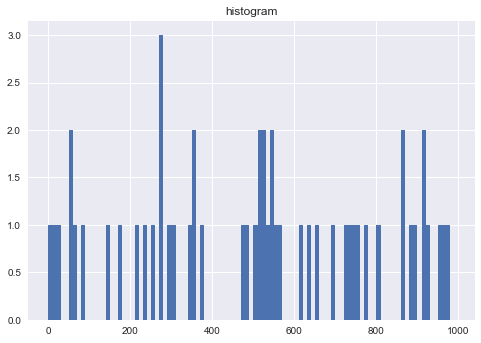

In [22]:
plt.hist(f, bins=range(1,1000,10))
plt.title("histogram")
plt.show()

In [23]:
df.sort_values(by='Total Savings')

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
351,"ROYAL DEVELOPMENT, INC.",BILL FURLEITER,royalbaltic@gmail.com,7183858300,"723 BRISTOL ST.,",Brooklyn,NY,11236,Manufacturing,MANUFACTURER,ECSP,27.0,NaN,54.0,05/18/2007,-109910.06,103862.35,Brooklyn,40.653192,-73.908432,316.0,42.0,922.0,3083057.0,3.036420e+09,Brownsville
155,"FALCONE'S COOKIELAND, LTD.",CARMINE FALCONE,Falconecookie@aol.com,7182364200,1632 61ST STREET,Brooklyn,NY,11204,Manufacturing,MFG. FLAT BREAD & COOKIES,ECSP,55.0,NaN,NaN,06/09/2011,-379.47,89379.70,Brooklyn,40.623705,-73.991628,311.0,44.0,248.0,3132386.0,3.055240e+09,Bensonhurst West
185,"GRAND MERIDIAN PRINTINGS, INC.",Kwok Yim Chow,gm3343388@aol.com,7189373888,31-16 Hunters Point Ave,Queens,NY,11101,Manufacturing,COMMERCIAL PRINTER,ECSP,31.0,NaN,NaN,06/08/2009,-30.82,45996.81,Queens,40.740189,-73.935824,402.0,26.0,199.0,4314365.0,4.002890e+09,Hunters Point-Sunnyside-West Maspeth
199,"HI INTERIORS, INC.",GREGORY MADZIO,NaN,2126860401,62 18TH STREET 6TH FL,BROOKLYN,NY,11215,Manufacturing,Cabinets and doors,ECSP,7.0,NaN,NaN,08/10/2007,-23.92,22304.07,Brooklyn,40.666626,-73.997675,307.0,38.0,18.0,3336793.0,3.006320e+09,Sunset Park West
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
449,Wurtec Incorporated,Bill Popp,bill.popp@wurtec.com,4197261066,31-50 31st Street,Lond Island City,NY,11106,Wholesale/Warehouse/Distribution,Elevator tooling products,ECSP,2.0,NaN,NaN,10/03/2019,0.00,0.00,Queens,40.763148,-73.924442,401.0,22.0,61.0,4007562.0,4.005890e+09,Astoria
353,"RUGUS REALTY, INC. DBA MISS GRIMBLE",Errol Bier,errol@missgrimble.com,7186652253,909 EAST 135TH STREET,Bronx,NY,10454,Manufacturing,LANDLORD/WHOLSALE,ECSP,5.0,2.0,5.0,04/10/2007,1.85,21780.28,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
432,"WALDORF BAKERY, INC. DBA MAURICE",CRAIG BIER,mrdessert@gmail.com,7186652496,909 EAST 135TH STREET,bronx,NY,10454,Manufacturing,WHOLESALE,ECSP,6.0,3.0,6.0,06/08/2007,18.70,13734.02,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
367,"Silverman Ceramics, LLC/Alsio Design, LLC",ROBERT SILVERMAN,2bsilverman@gmail.com,9173705858,1155-1205 MANHATTAN AVENUE,BROOKLYN,NY,11222,Manufacturing,specializing in ceramic prototypes for special...,ECSP,3.0,NaN,NaN,12/03/2007,26.55,1437.94,Brooklyn,40.738162,-73.955442,301.0,33.0,563.0,3404803.0,3.024720e+09,Greenpoint
137,"DURA FOAM, INC.",ANTHONY FONTANA,ldyjewles@yahoo.com,7188481216,63-02 59TH AVENUE,Queens,NY,11378,Manufacturing,MFG/FABR FOAM & CUSHIONS,ECSP,14.0,10.0,14.0,03/01/2006,52.33,323.11,Queens,40.719695,-73.901421,405.0,30.0,521.0,4437578.0,4.027550e+09,Maspeth


In [24]:
df_pos = df.drop(index =df[ df['Total Savings'] <=0].index  ) #dropping all non-positive total savings

In [25]:
df_pos.sort_values(by='Total Savings')

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
353,"RUGUS REALTY, INC. DBA MISS GRIMBLE",Errol Bier,errol@missgrimble.com,7186652253,909 EAST 135TH STREET,Bronx,NY,10454,Manufacturing,LANDLORD/WHOLSALE,ECSP,5.0,2.0,5.0,04/10/2007,1.85,21780.28,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
432,"WALDORF BAKERY, INC. DBA MAURICE",CRAIG BIER,mrdessert@gmail.com,7186652496,909 EAST 135TH STREET,bronx,NY,10454,Manufacturing,WHOLESALE,ECSP,6.0,3.0,6.0,06/08/2007,18.70,13734.02,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
367,"Silverman Ceramics, LLC/Alsio Design, LLC",ROBERT SILVERMAN,2bsilverman@gmail.com,9173705858,1155-1205 MANHATTAN AVENUE,BROOKLYN,NY,11222,Manufacturing,specializing in ceramic prototypes for special...,ECSP,3.0,NaN,NaN,12/03/2007,26.55,1437.94,Brooklyn,40.738162,-73.955442,301.0,33.0,563.0,3404803.0,3.024720e+09,Greenpoint
137,"DURA FOAM, INC.",ANTHONY FONTANA,ldyjewles@yahoo.com,7188481216,63-02 59TH AVENUE,Queens,NY,11378,Manufacturing,MFG/FABR FOAM & CUSHIONS,ECSP,14.0,10.0,14.0,03/01/2006,52.33,323.11,Queens,40.719695,-73.901421,405.0,30.0,521.0,4437578.0,4.027550e+09,Maspeth
404,"Tracy Watts, Inc.",Tracy Watts,tw@tracywatts.com,7184997090,"119 8th Street, #201",Brooklyn,NY,11215,Manufacturing,designer of women and men hats,ECSP,3.0,NaN,NaN,08/11/2009,54.71,5035.91,Brooklyn,40.672716,-73.991835,306.0,39.0,121.0,3021770.0,3.009960e+09,Park Slope-Gowanus
398,The Woodwrights,Wyeth Hunnable,why86@verizon.net,9175668346,221 McKibbin Street,Brooklyn,NY,11206,Manufacturing,Mfg. of Wood Cabinets,ECSP,2.0,NaN,NaN,02/05/2010,67.01,646.24,Brooklyn,40.705404,-73.938696,301.0,34.0,485.0,3071386.0,3.030820e+09,Bushwick South
345,ROGELIO'S WAY/DIGITAL LAUNDRY,DANIEL GOLDSTEIN,dg@digitallaundry.net,9174921757,173 E 120TH STREET,NEW YORK,NY,10035,Wholesale/Warehouse/Distribution,Archives and stores digital media assets,ECSP,6.0,NaN,NaN,12/12/2007,83.79,7432.20,New York,40.800767,-73.938738,111.0,8.0,196.0,1054379.0,1.017690e+09,East Harlem North
371,"Sizzal, LLC",Al Weiss,al@influencegraphics.com,7183614205,11-05 44th Road,Queens,NY,11101,Manufacturing,digital and large format printing,ECSP,19.0,NaN,NaN,01/06/2011,145.47,69259.46,Queens,40.749240,-73.949065,402.0,26.0,19.0,4005225.0,4.004460e+09,Hunters Point-Sunnyside-West Maspeth
379,"Spin Master, Inc.",Mark Segal,hollyp@spinmaster.com,4163646002,30-30 47th Avenue,Lond Island City,NY,11101,Other,Novelty Products,ECSP,60.0,NaN,NaN,07/07/2020,172.82,962.95,Queens,40.743168,-73.936568,402.0,26.0,199.0,4003540.0,4.002820e+09,Hunters Point-Sunnyside-West Maspeth
211,"IDL Communications and Electric, Inc",Eva Rose Cupit,ecupit@idlelectric.com,7184429099,"850 Third Ave, #408",Brooklyn,NY,11232,Commercial,Electrical Contractors,ECSP,89.0,NaN,NaN,02/12/2020,212.59,212.59,Brooklyn,40.658518,-74.003327,307.0,38.0,18.0,3009889.0,3.006710e+09,Sunset Park West


In [26]:
g = df_pos['Total Savings']
df_pos['Log10 Total Savings']=np.log10(df_pos['Total Savings'])
df_pos[['Log10 Total Savings','Total Savings']]

,Log10 Total Savings,Total Savings
1,5.135381,136578.20
2,5.481384,302959.40
3,3.334387,2159.67
4,5.964923,922407.32
5,5.566557,368601.17
6,3.214126,1637.29
7,3.641525,4380.51
8,3.403807,2534.00
9,4.498088,31483.87
10,4.971625,93675.37


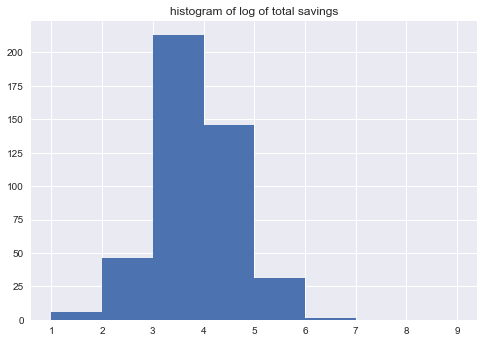

In [27]:
plt.hist(df_pos['Log10 Total Savings'], bins=range(1,10))
plt.title("histogram of log of total savings")
plt.show()

In [28]:
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,LMEP,958.0,NaN,NaN,07/02/2015,368601.17,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ECSP,125.0,NaN,NaN,04/07/2008,1637.29,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
7,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ECSP,6.0,NaN,NaN,12/08/2009,4380.51,59681.70,Staten Island,40.633153,-74.150999,501.0,49.0,239.0,5146740.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ECSP,35.0,NaN,NaN,03/04/2011,2534.00,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
9,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ECSP,9.0,NaN,NaN,11/06/2015,31483.87,187637.74,Brooklyn,40.673106,-74.002300,306.0,38.0,53.0,3336622.0,3.005720e+09,Carroll Gardens-Columbia Street-Red Hook


In [29]:
df[['Job created', 'Effective Date']]

,Job created,Effective Date
0,NaN,03/04/2005
1,NaN,04/02/2008
2,NaN,01/05/2015
3,NaN,02/03/2020
4,NaN,06/30/2017
5,NaN,07/02/2015
6,NaN,04/07/2008
7,NaN,12/08/2009
8,NaN,03/04/2011
9,NaN,11/06/2015


In [30]:
date = df[['Job created', 'Effective Date']]

In [31]:
date = date.replace(np.nan,0)

date['Effective Date'] = pd.to_datetime(date['Effective Date'])


In [32]:
date['Effective Date'] = date['Effective Date'].dt.strftime('%m/%Y')

In [33]:
date_grp = date.groupby('Effective Date')

In [34]:
date_grp.count()

,Job created
Effective Date,
01/2008,6
01/2009,5
01/2010,1
01/2011,6
01/2012,6
01/2013,3
01/2015,2
01/2016,3
01/2017,2


In [35]:
g1 = date_grp.count().reset_index() #Convert the group to a new data frame g1.
g1

,Effective Date,Job created
0,01/2008,6
1,01/2009,5
2,01/2010,1
3,01/2011,6
4,01/2012,6
5,01/2013,3
6,01/2015,2
7,01/2016,3
8,01/2017,2
9,01/2018,3


In [36]:
g1[['month','year']]     =   g1['Effective Date'].str.split('/', expand = True)
g1.sort_values(by=['year', 'month'])

,Effective Date,Job created,month,year
11,02/1993,1,02,1993
25,03/2004,1,03,2004
12,02/2005,1,02,2005
26,03/2005,1,03,2005
62,06/2005,1,06,2005
27,03/2006,1,03,2006
40,04/2007,1,04,2007
51,05/2007,2,05,2007
63,06/2007,2,06,2007
76,07/2007,4,07,2007


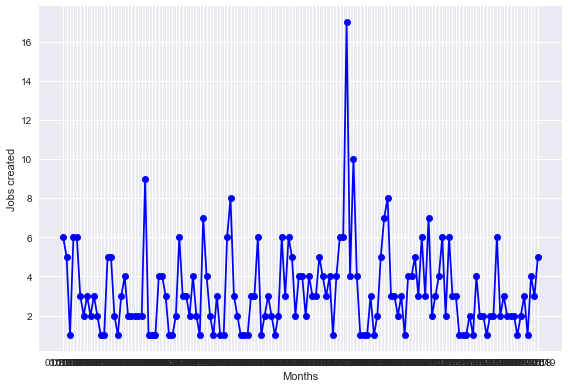

In [37]:

months = g1['Effective Date']
xindexes=np.arange(len(months))
jobs = g1['Job created']
plt.plot(months, jobs, 'b',marker='o')
plt.xlabel('Months')
plt.ylabel('Jobs created')

plt.xticks(ticks=xindexes, labels=months)
plt.tight_layout()
plt.show()